In [1]:
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

## Генератор стилей

In [2]:
styles = {
    'прическа':[
        'нет волос',
        'длинные в пучок',
        'длинные волнистые',
        'длинные прямые',
        'короткая волнистые',
        'короткая прямые',
        'короткая курчавые'
    ],
    'цвет волос':[
        'черный',
        'блонд',
        'каштановый',
        'пастельный розовый',
        'рыжий',
        'серебристо серый',
    ],
    'аксесуар':[
        'нет очков',
        'круглые очки',
        'солнцезащитные очки',
    ],
    'одежда':[
        'худи',
        'комбинезон',
        'футболка с круглым вырезом',
        'футболка с V-вырезом',
    ],
    'цвет одежды':[
        'черный',
        'синий',
        'серый',
        'зеленый',
        'оранжевый',
        'розовый',
        'красный',
        'белый'
    ],
}

styles_count = {
    'прическа':[
        7,
        0,
        1,
        23,
        1,
        11,
        7
    ],
    'цвет волос':[
        7,
        6,
        2,
        3,
        8,
        24,
    ],
    'аксесуар':[
        11,
        22,
        17,
    ],
    'одежда':[
        7,
        18,
        19,
        6,
    ],
    'цвет одежды':[
        4,
        5,
        6,
        8,
        6,
        8,
        7,
        6
    ],
}

In [3]:
for k in styles_count:
    for s in range(len(styles_count[k])):
        styles_count[k][s] += 1

In [4]:
probabilities_by_style = {style: [count / sum(styles_count[style]) for count in styles_count[style]]  for style in styles}
probabilities_by_style

{'прическа': [0.14035087719298245,
  0.017543859649122806,
  0.03508771929824561,
  0.42105263157894735,
  0.03508771929824561,
  0.21052631578947367,
  0.14035087719298245],
 'цвет волос': [0.14285714285714285,
  0.125,
  0.05357142857142857,
  0.07142857142857142,
  0.16071428571428573,
  0.44642857142857145],
 'аксесуар': [0.22641509433962265, 0.4339622641509434, 0.33962264150943394],
 'одежда': [0.14814814814814814,
  0.35185185185185186,
  0.37037037037037035,
  0.12962962962962962],
 'цвет одежды': [0.08620689655172414,
  0.10344827586206896,
  0.1206896551724138,
  0.15517241379310345,
  0.1206896551724138,
  0.15517241379310345,
  0.13793103448275862,
  0.1206896551724138]}

In [5]:
def generate_style():
    generated_style = {}
    probability = 1.0
    for style in styles:
        choice = random.choices(styles[style], probabilities_by_style[style])[0]
        generated_style[style] = choice
        probability *= probabilities_by_style[style][styles[style].index(choice)]
    return generated_style, probability

In [6]:
style, prob = generate_style()
print("Style: ", style)
print("Probability: ", prob)

Style:  {'прическа': 'длинные прямые', 'цвет волос': 'серебристо серый', 'аксесуар': 'нет очков', 'одежда': 'футболка с круглым вырезом', 'цвет одежды': 'розовый'}
Probability:  0.002445932658582044


## Генератор изображений

In [7]:
def load_avatar_pixels(folder_path):
    image_pixel_dicts = []
    for image_path in os.listdir(folder_path):
        pixel_dict = {}
        image_path = f'{folder_path}/{image_path}'
        img = Image.open(image_path).convert('RGB')
        width, height = img.size

        for y in range(height):
            for x in range(width):
                r, g, b = img.getpixel((x, y))
                pixel_number = y * width + x
                pixel_dict[pixel_number] = (r, g, b)

        image_pixel_dicts.append(pixel_dict)

    return image_pixel_dicts

def calculate_pixel_statistics(image_pixel_dicts, width, height):
    red_all_statistics, green_all_statistics, blue_all_statistics = {}, {}, {}
    num_images = len(image_pixel_dicts)

    for pixel_number in range(width * height):
        red_histogram = np.zeros(256)
        green_histogram = np.zeros(256)
        blue_histogram = np.zeros(256)

        for pixel_dict in image_pixel_dicts:
            r, g, b = pixel_dict[pixel_number]
            red_histogram[r] += 1
            green_histogram[g] += 1
            blue_histogram[b] += 1

        red_all_statistics[pixel_number] = red_histogram / num_images
        green_all_statistics[pixel_number] = green_histogram / num_images
        blue_all_statistics[pixel_number] = blue_histogram / num_images

    return red_all_statistics, green_all_statistics, blue_all_statistics

def generate_avatar(image_pixel_dicts, red_stats, green_stats, blue_stats, width, height):
    new_img = Image.new('RGB', (width, height))

    for y in range(height):
        for x in range(width):
            possible_red_values = np.arange(256)
            possible_green_values = np.arange(256)
            possible_blue_values = np.arange(256)

            red_probabilities = red_stats[(y * width) + x]
            green_probabilities = green_stats[(y * width) + x]
            blue_probabilities = blue_stats[(y * width) + x]

            new_r = np.random.choice(possible_red_values, p=red_probabilities)
            new_g = np.random.choice(possible_green_values, p=green_probabilities)
            new_b = np.random.choice(possible_blue_values, p=blue_probabilities)

            new_img.putpixel((x, y), (new_r, new_g, new_b))

    return new_img


Генерация 1:


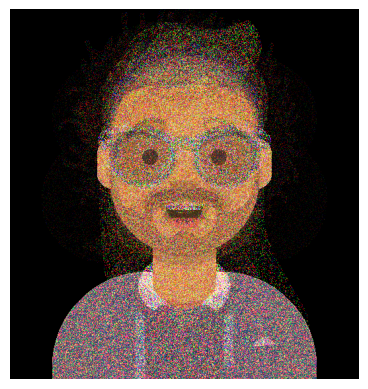

Генерация 2:


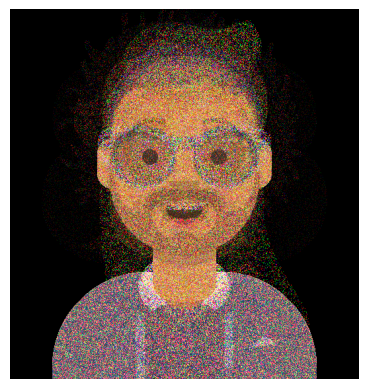

Генерация 3:


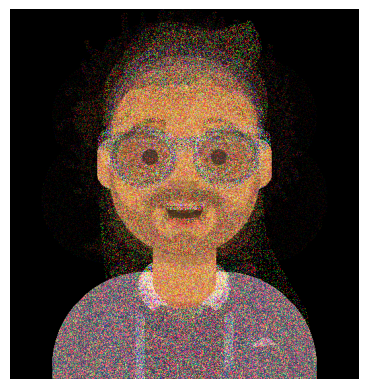

Генерация 4:


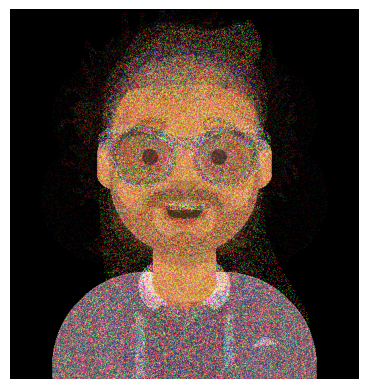

Генерация 5:


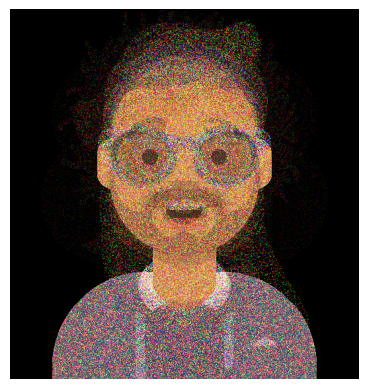

In [8]:
folder_path = 'avatars'
image_pixel_dicts = load_avatar_pixels(folder_path)
width, height = (528, 560)
red_stats, green_stats, blue_stats = calculate_pixel_statistics(image_pixel_dicts, width, height)


num_generated_avatars = 5
for i in range(num_generated_avatars):
    print(f"Генерация {i + 1}:")
    new_avatar = generate_avatar(image_pixel_dicts, red_stats, green_stats, blue_stats, width, height)
    plt.imshow(new_avatar)
    plt.axis('off')
    plt.show()